# Proyecto

**Objetivo del Proyecto :** Análisis comparativo de algoritmos de clasificación, basados en lenguaje máquina, para la predicción de bancarrota, según datos financieros.

**Conjunto De Datos A Utilizar :**  Taiwanese Bankruptcy Prediction Data Set -
https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

**Algoritmo :** XGBoost Classifier - 
https://xgboost.readthedocs.io/en/latest/

## Path definition

In [1]:
# Si se trabaja conectado a drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
% cd /content/gdrive/MyDrive/Dataset

/content/gdrive/MyDrive/Dataset


In [1]:
% ls -lhtr

## Metodología


> **CRISP - DM**

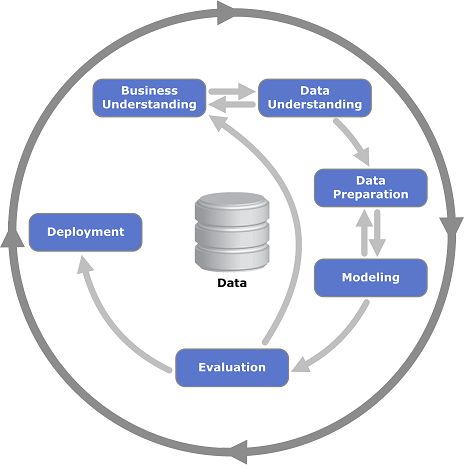




### **1. Carga de Modulos**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import re
import joblib
import warnings
warnings.filterwarnings('ignore')

### **2. Lectura Inicial de datos**

#### 2.1. Carga de datos

In [5]:
# Se carga el dataset normalizado
dataset_normalizado = pd.read_pickle(os.path.join('results','dataset_normalizado.pkl'))
dataset_normalizado.shape

(6819, 95)

In [6]:
dataset_normalizado.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X86,X87,X88,X89,X90,X91,X92,X93,X95,flag
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-2.254317,0.017106,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067,1.0
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.309033,-0.009316,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573,1.0
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.820510,0.924712,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,-0.621960,1.0
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,-1.691222,-0.158822,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,-0.471826,1.0
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.316008,-0.140392,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,-0.241715,1.0


#### 2.2. Buenas prácticas

In [ ]:
# Este paso fue trabajado en el script "02. Data Preparation.ipynb"

#### 2.3. Análisis Exploratorio de Datos (EDA)

In [ ]:
# Este paso fue trabajado en el script "01. Data Understanding .ipynb" y "02. Data Preparation.ipynb"

### **3. Tratamientos o Recodificacion de variables**

In [ ]:
# Este paso fue trabajado en el script "01. Data Understanding .ipynb" y "02. Data Preparation.ipynb"

#### 3.1. Completitud de los datos

In [ ]:
# Este paso fue trabajado en el script  "02. Data Preparation.ipynb"

#### 3.2. Recodificacion de los datos

In [ ]:
# Este paso fue trabajado en el script  "02. Data Preparation.ipynb"

### **4. Ingeniería y Selección de Variables**

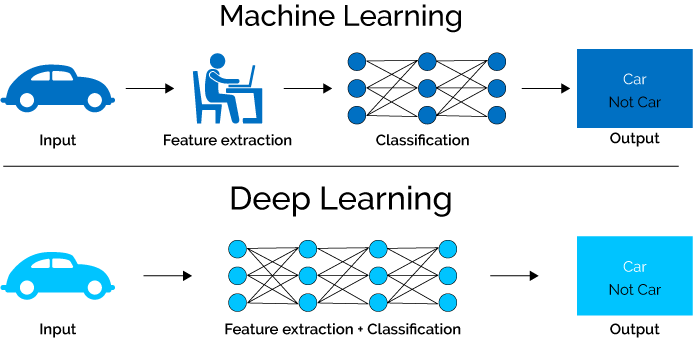

#### 4.1. Ingenieria de variables

In [ ]:
# Para este caso no se crearan más variables, dado que con las que se cuenta ya representan al comportamiento que se desea explicar

#### 4.2. Selección de variables

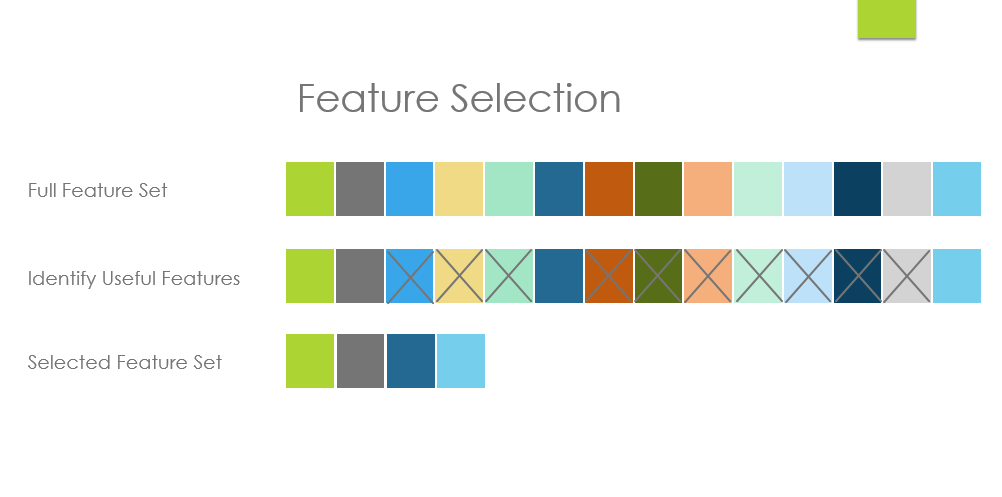

In [4]:
# Selección por Random Forest
forest = RandomForestClassifier(100, n_jobs=-1, oob_score=True)                                                   
X = dataset_normalizado.drop('flag',axis=1)
y = dataset_normalizado.flag                                               
forest.fit(X, y)                                                                  
importances = forest.feature_importances_ 

In [5]:
importances_ = pd.DataFrame({"columns":X.columns, "importances":importances}).sort_values("importances", ascending=False)

importances_.style.bar()

,columns,importances
29,X30,0.032117
89,X90,0.028228
18,X19,0.025447
22,X23,0.021428
39,X40,0.021211
42,X43,0.020527
16,X17,0.019339
64,X65,0.017246
56,X57,0.016334
91,X92,0.016272


### **5. Modelamiento de Datos o Creación del Algoritmo de ML**

#### 5.1. Particion Muestral

In [8]:
X = dataset_normalizado.drop('flag', axis = 1)
y = dataset_normalizado.flag

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 1) 

In [10]:
# Verificamos la distribuición del target
y.value_counts()/len(y)*100, y.value_counts()

(0.0    96.77372
 1.0     3.22628
 Name: flag, dtype: float64,
 0.0    6599
 1.0     220
 Name: flag, dtype: int64)

In [11]:
# Verificamos la distribuición del target de entrenamiento
y_train.value_counts()/len(y_train)*100, y_train.value_counts()

(0.0    96.773602
 1.0     3.226398
 Name: flag, dtype: float64,
 0.0    5279
 1.0     176
 Name: flag, dtype: int64)

In [12]:
# Verificamos la distribuición del target de validación
y_test.value_counts()/len(y_test)*100, y_test.value_counts()

(0.0    96.774194
 1.0     3.225806
 Name: flag, dtype: float64,
 0.0    1320
 1.0      44
 Name: flag, dtype: int64)

#### 5.2. Algoritmos Machine Learning

In [13]:
#Modelo Base
model_XGB_base = XGBClassifier(n_estimators=85, n_jobs=-1,  eval_metric='error')

In [14]:
model_XGB_base

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, eval_metric='error',
              gamma=None, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=None,
              max_delta_step=None, max_depth=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=85,
              n_jobs=-1, num_parallel_tree=None, random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=None, tree_method=None, validate_parameters=None,
              verbosity=None)

In [15]:
model_XGB_base.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=85, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [59]:
#Modelo con tuning
model_XGB = XGBClassifier(n_estimators=85, n_jobs=-1, max_depth=9, eval_metric='error')

In [63]:
model_XGB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=85, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [62]:
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=85, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [73]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve

resultados = {}
# Código obtenido del profesor César Olivares
def save_and_show_resultados(descripcion, model, resultados, X_train, X_test, y_train, y_test):
  y_train_pred = model.predict(X_train)
  y_train_pred_proba = model.predict_proba(X_train)[:,1]

  y_test_pred = model.predict(X_test)
  y_test_pred_proba = model.predict_proba(X_test)[:,1]

  resultados.update( { descripcion: {
      ('Entrenamiento', 'Exactitud'): model.score(X_train, y_train),
      ('Entrenamiento', 'Precisión'): precision_score(y_train, y_train_pred, zero_division=0),
      ('Entrenamiento', 'Exhaustividad'): recall_score(y_train, y_train_pred),
      ('Entrenamiento', 'F1'): f1_score(y_train, y_train_pred),
      ('Entrenamiento', 'AUC'): roc_auc_score(y_train, y_train_pred_proba),
      ('Pruebas', 'Exactitud'): model.score(X_test, y_test),
      ('Pruebas', 'Precisión'): precision_score(y_test, y_test_pred, zero_division=0),
      ('Pruebas', 'Exhaustividad'): recall_score(y_test, y_test_pred),
      ('Pruebas', 'F1'): f1_score(y_test, y_test_pred),
      ('Pruebas', 'AUC'): roc_auc_score(y_test, y_test_pred_proba)
    } } )
  display(pd.DataFrame.from_dict(resultados, orient='index'))

  fig, axes = plt.subplots(1, 3, figsize=(18, 5))
  fig.suptitle(f'{descripcion} (Conjunto de Pruebas)')
  plot_confusion_matrix(model, X_test, y_test, ax=axes[0], values_format='d')
  plot_roc_curve(model, X_test, y_test, ax=axes[1], name=descripcion)
  plot_precision_recall_curve(model, X_test, y_test, ax=axes[2], name=descripcion)
  return

Entrenamiento                                    \
                          Exactitud Precisión Exhaustividad   F1  AUC   
XGBoost Classifier 1            1.0       1.0           1.0  1.0  1.0   
XGBoost Classifier 2            1.0       1.0           1.0  1.0  1.0   
XGBoost Classifier 3            1.0       1.0           1.0  1.0  1.0   
XGBoost Classifier 1b           1.0       1.0           1.0  1.0  1.0   
XGBoost Classifier 1c           1.0       1.0           1.0  1.0  1.0   

                        Pruebas                                              
                      Exactitud Precisión Exhaustividad        F1       AUC  
XGBoost Classifier 1   0.972141  0.714286      0.227273  0.344828  0.923192  
XGBoost Classifier 2   0.970674  0.642857      0.204545  0.310345  0.930906  
XGBoost Classifier 3   0.968475  0.533333      0.181818  0.271186  0.931749  
XGBoost Classifier 1b  0.972141  0.714286      0.227273  0.344828  0.923192  
XGBoost Classifier 1c  0.972141  0.714286      0.227273  0.344828  0.923192

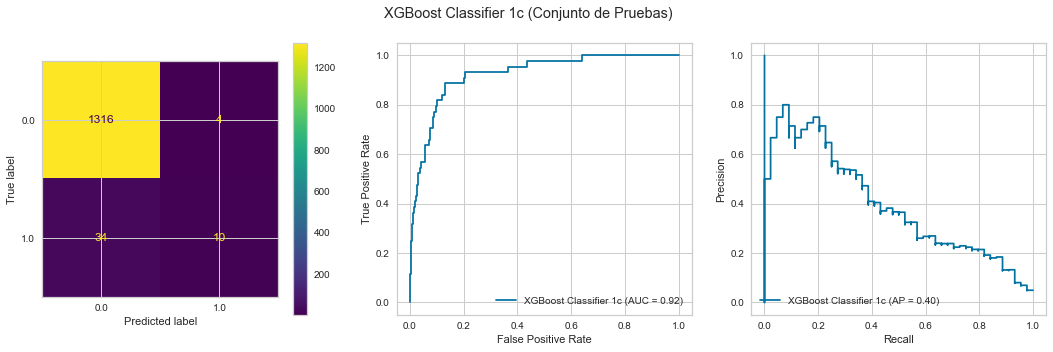

In [64]:
save_and_show_resultados('XGBoost Classifier 1c',model_XGB, resultados, X_train, X_test, y_train, y_test)

In [51]:
y_pred = model_XGB.predict(X_test)
y_pred_proba = model_XGB.predict_proba(X_test)[:,1]
# predictions = [round(value) for value in y_pred]
predictions = y_pred
accuracy = accuracy_score(y_test, predictions)
auc = roc_auc_score(y_test, y_pred_proba)
f1_score_ = f1_score(y_test, predictions)
type1_error = confusion_matrix(y_test, predictions)[0][1]
print("Accuracy: %.4f" % (accuracy * 100.0))
print("ROC AUC: %.4f" % (auc))
print("F1-Score: %.4f" % (f1_score_))
print("Type I Error: %.1f" % (type1_error))

Accuracy: 97.2141
ROC AUC: 0.9232
F1-Score: 0.3448
Type I Error: 4.0


In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1320
         1.0       0.71      0.23      0.34        44

    accuracy                           0.97      1364
   macro avg       0.84      0.61      0.67      1364
weighted avg       0.97      0.97      0.97      1364



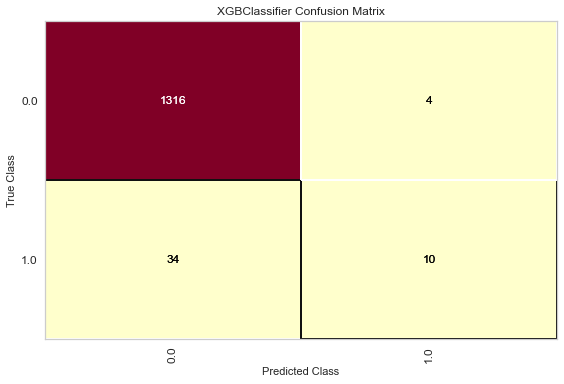

In [52]:
viz = ConfusionMatrix(model_XGB)
# viz.fit(X_train, y_train)
# viz.score(X_train, y_train)
viz.score(X_test, y_test)
viz.draw()
viz.finalize()

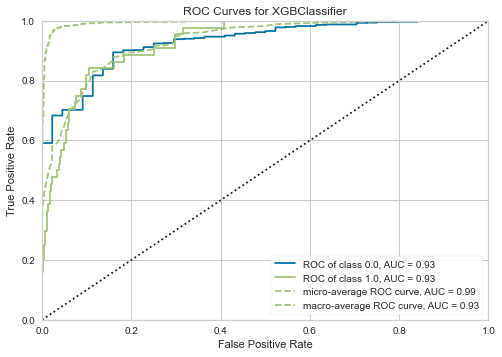

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary=None,
       estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='error', gamma=0,
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=85,
                               n_jobs=-1, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, v

In [53]:
# Área bajo la curva
roc_auc(model_XGB_base, X_train, y_train, X_test=X_test, y_test=y_test)

##### 5.2.1. Tuning - GridSearchCV

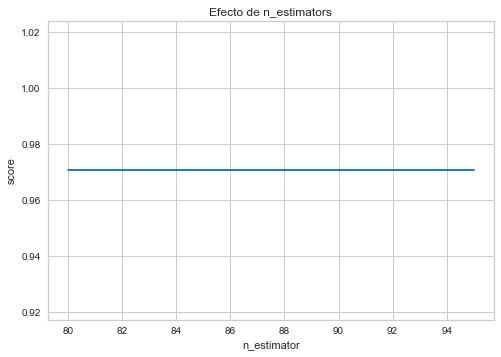

In [26]:
model_XGB = XGBClassifier(n_jobs=-1,  eval_metric='error')
estimators = np.arange(80, 100, 5)
scores = []
for n in estimators:
    model_XGB.set_params(n_estimators=n)
    model_XGB.fit(X_train, y_train)
    scores.append(model_XGB.score(X_test, y_test))
plt.title("Efecto de n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

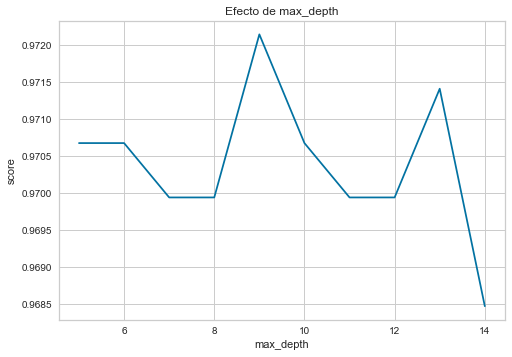

In [29]:
model_XGB = XGBClassifier(n_estimators=85, n_jobs=-1, eval_metric='error')
max_depth = np.arange(5, 15, 1)
scores_ = []
for n in max_depth:
    model_XGB.set_params(max_depth=n)
    model_XGB.fit(X_train, y_train)
    scores_.append(model_XGB.score(X_test, y_test))
plt.title("Efecto de max_depth")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(max_depth, scores_)

In [36]:
model_XGB = XGBClassifier(n_estimators=85, n_jobs=-1, eval_metric='error', max_depth=9)
train_tune = dataset_normalizado
target = 'flag'
predictors = [x for x in train_tune.columns if x not in [target]]

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(n_estimators=85, n_jobs=-1, eval_metric='error'), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch1.fit(train_tune[predictors],train_tune[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([5.35025878, 5.2579061 , 4.68928628, 7.39522324, 6.35679994,
         5.49989166, 7.73012748, 6.26983285, 5.74643245, 7.72474189,
         6.04503388, 3.69950638]),
  'std_fit_time': array([0.29115934, 0.0567925 , 0.36180418, 0.07378103, 0.31955724,
         0.10684883, 0.1346501 , 0.28289371, 0.12089284, 0.17740717,
         0.28118246, 0.79642264]),
  'mean_score_time': array([0.01316481, 0.01276569, 0.0129653 , 0.01097064, 0.01196809,
         0.01196799, 0.01117005, 0.01097064, 0.01017284, 0.00897613,
         0.00917559, 0.00698133]),
  'std_score_time': array([0.00364534, 0.00359052, 0.00393894, 0.00141037, 0.00227435,
         0.00260082, 0.00159587, 0.00063075, 0.00116307, 0.0018923 ,
         0.00222133, 0.00109245]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

In [42]:
param_test2 = {
 'max_depth':[8,9,10],
 'min_child_weight':[3,4,5]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(n_estimators=85, n_jobs=-1, eval_metric='error'), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch2.fit(train_tune[predictors],train_tune[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([6.2578619 , 6.26664042, 5.6762197 , 6.48406024, 6.08871746,
         5.78133907, 6.72840657, 5.02915068, 3.95103374]),
  'std_fit_time': array([0.46880065, 0.239165  , 0.48070499, 0.24302494, 0.25955876,
         0.35107326, 0.16506092, 0.57283604, 0.25832926]),
  'mean_score_time': array([0.01196823, 0.01236701, 0.0093751 , 0.01057162, 0.01176853,
         0.00877666, 0.01176834, 0.00718088, 0.00678196]),
  'std_score_time': array([0.00141057, 0.00205375, 0.00101721, 0.00119687, 0.00255443,
         0.00097733, 0.00369977, 0.00116304, 0.00132305]),
  'param_max_depth': masked_array(data=[8, 8, 8, 9, 9, 9, 10, 10, 10],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[3, 4, 5, 3, 4, 5, 3, 4, 5],
               mask=[False, False, False, False, False, False, False, False,
                     False],
      

##### 5.2.2. Exportamos el mejor modelo

In [54]:
#Guardamos el mejor modelo
joblib.dump(model_XGB, os.path.join('modelos','Modelo_XGB.pkl'))

['modelos\\Modelo_XGB.pkl']

In [65]:
# Cargamos el mejor modelo, entrenado y optimizado
model_XGB_imp = joblib.load(os.path.join('modelos','Modelo_XGB.pkl'))

In [66]:
model_XGB_imp

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=85, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [78]:
# Modelamiento de la data usando un diccionario de datasets y modelos
def perform_data_evaluation(modelos, imputed_df):
    # to show table
    resultados = {}

    # hacemos la division del dataframe en variables y etiquetas
    X = dataset_normalizado.drop('flag', axis = 1)
    y = dataset_normalizado.flag

    # Dividimos la data en test y train
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 1)
    # Iteramos sobre los clasificadores
    for model_name, clf in modelos.items():
       
        # actualiza resultados
        save_and_show_resultados(model_name, clf, resultados, X_train, X_test, y_train, y_test)

    # presentamos la tabla resumen
    tabla_results = tabla_resultados(resultados)

    return tabla_results

In [68]:
def tabla_resultados(resultados):
  df = pd.DataFrame.from_dict(resultados, orient='index')
  display(df)
  return df

In [69]:
# función para separar las columnas en variables y etiquetas ('flag')
def split_features_labels(df):
    feature_dfs = df.iloc[:, 1:]
    label_dfs = df['flag']
    return feature_dfs, label_dfs

Entrenamiento                                     Pruebas            \
        Exactitud Precisión Exhaustividad   F1  AUC Exactitud Precisión   
XGB           1.0       1.0           1.0  1.0  1.0  0.972141  0.714286   

                                       
    Exhaustividad        F1       AUC  
XGB      0.227273  0.344828  0.923192

Entrenamiento                                     Pruebas            \
        Exactitud Precisión Exhaustividad   F1  AUC Exactitud Precisión   
XGB           1.0       1.0           1.0  1.0  1.0  0.972141  0.714286   

                                       
    Exhaustividad        F1       AUC  
XGB      0.227273  0.344828  0.923192

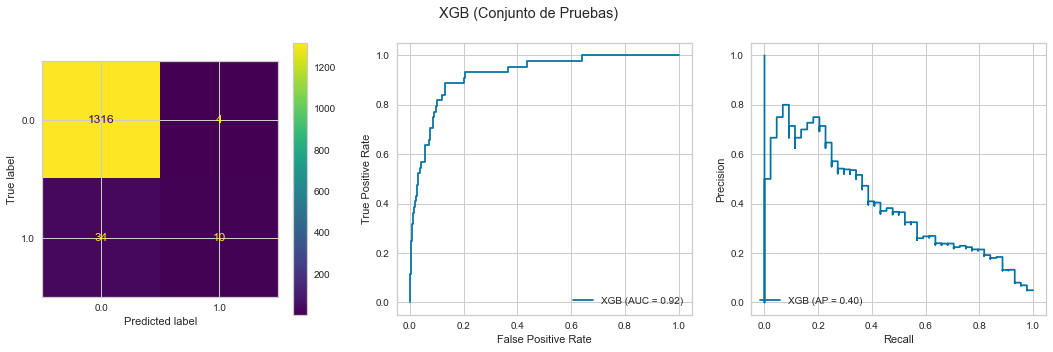

In [79]:
from collections import OrderedDict
models_dictionary2 = OrderedDict()
models_dictionary2['XGB'] = model_XGB_imp
metricas = perform_data_evaluation(models_dictionary2, dataset_normalizado)

Entrenamiento                                     Pruebas  \
                  Exactitud Precisión Exhaustividad   F1  AUC Exactitud   
MODEL_XGB_IMP           1.0       1.0           1.0  1.0  1.0  0.972141   

                                                           
              Precisión Exhaustividad        F1       AUC  
MODEL_XGB_IMP  0.714286      0.227273  0.344828  0.923192

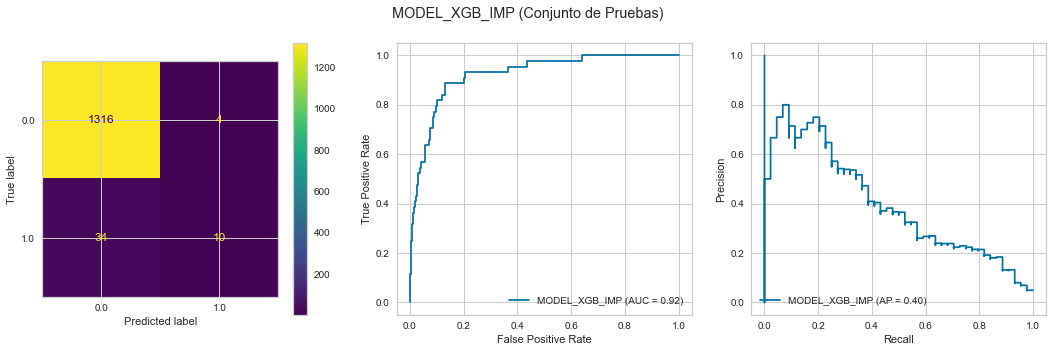

In [74]:
save_and_show_resultados("MODEL_XGB_IMP", model_XGB_imp, resultados, X_train, X_test, y_train, y_test)